In [72]:
import pandas as pd
import numpy as np

df = pd.read_csv('telecom_merge1.csv')
df.drop(columns=['FaultInjected'], inplace=True)
df.head()

,Timestamp,EquipmentID,EquipmentType,Location,EquipmentAgeDays,Alarm_SpanLoss,Alarm_OpticalReturnLoss,Alarm_Temperature,Alarm_Voltage,SpanLoss,...,interface_in_errors,interface_out_errors,cpu_utilization,memory_utilization,temperature_status,fan_status,power_status,alarms_count,downstream_impact_score,IsRootCause
0,2023-06-06 00:00:00,ce-ro-2,Router,London,695,0,0,1,0,0.624004,...,382,99,92,32,critical,normal,normal,3,0.94,1
1,2023-06-06 00:00:00,cpe-sw-12,Switch,New York,1139,0,0,0,0,0.626338,...,198,331,76,84,normal,normal,normal,2,0.85,0
2,2023-06-06 00:00:00,cpe-sw-4,Switch,Sydney,293,1,0,0,0,2.548818,...,44,378,44,87,normal,normal,normal,5,0.88,1
3,2023-06-06 00:00:00,ce-ro-24,Router,London,551,0,0,0,0,0.556153,...,344,163,79,89,normal,normal,normal,3,0.02,0
4,2023-06-06 00:00:00,cpe-sw-10,Switch,London,457,1,1,0,0,3.419005,...,6,176,59,96,normal,normal,normal,4,0.80,1


In [73]:
df.columns

Index(['Timestamp', 'EquipmentID', 'EquipmentType', 'Location',
       'EquipmentAgeDays', 'Alarm_SpanLoss', 'Alarm_OpticalReturnLoss',
       'Alarm_Temperature', 'Alarm_Voltage', 'SpanLoss', 'OpticalReturnLoss',
       'Temperature', 'Voltage', 'PowerOutage', 'FiberCut', 'ParentDeviceID',
       'upstream_status', 'downstream_status', 'interface_status',
       'interface_in_errors', 'interface_out_errors', 'cpu_utilization',
       'memory_utilization', 'temperature_status', 'fan_status',
       'power_status', 'alarms_count', 'downstream_impact_score',
       'IsRootCause'],
      dtype='object')

In [74]:
df = pd.get_dummies(df, columns=['EquipmentType','Location','temperature_status','fan_status','power_status','interface_status','upstream_status','downstream_status'], drop_first=True)
df.head()

,Timestamp,EquipmentID,EquipmentAgeDays,Alarm_SpanLoss,Alarm_OpticalReturnLoss,Alarm_Temperature,Alarm_Voltage,SpanLoss,OpticalReturnLoss,Temperature,...,fan_status_normal,fan_status_warning,power_status_normal,power_status_warning,interface_status_testing,interface_status_up,upstream_status_down,upstream_status_up,downstream_status_all_up,downstream_status_partial_down
0,2023-06-06 00:00:00,ce-ro-2,695,0,0,1,0,0.624004,58.092106,42.782928,...,True,False,True,False,True,False,False,True,False,True
1,2023-06-06 00:00:00,cpe-sw-12,1139,0,0,0,0,0.626338,59.895395,15.754963,...,True,False,True,False,False,True,False,True,True,False
2,2023-06-06 00:00:00,cpe-sw-4,293,1,0,0,0,2.548818,56.395641,17.306760,...,True,False,True,False,False,False,False,True,False,True
3,2023-06-06 00:00:00,ce-ro-24,551,0,0,0,0,0.556153,59.399159,16.050716,...,True,False,True,False,True,False,False,True,True,False
4,2023-06-06 00:00:00,cpe-sw-10,457,1,1,0,0,3.419005,45.307678,17.150788,...,True,False,True,False,False,True,False,True,False,False


In [75]:
df.columns

Index(['Timestamp', 'EquipmentID', 'EquipmentAgeDays', 'Alarm_SpanLoss',
       'Alarm_OpticalReturnLoss', 'Alarm_Temperature', 'Alarm_Voltage',
       'SpanLoss', 'OpticalReturnLoss', 'Temperature', 'Voltage',
       'PowerOutage', 'FiberCut', 'ParentDeviceID', 'interface_in_errors',
       'interface_out_errors', 'cpu_utilization', 'memory_utilization',
       'alarms_count', 'downstream_impact_score', 'IsRootCause',
       'EquipmentType_Router', 'EquipmentType_Switch', 'Location_London',
       'Location_New York', 'Location_Sydney', 'Location_Tokyo',
       'temperature_status_normal', 'temperature_status_warning',
       'fan_status_normal', 'fan_status_warning', 'power_status_normal',
       'power_status_warning', 'interface_status_testing',
       'interface_status_up', 'upstream_status_down', 'upstream_status_up',
       'downstream_status_all_up', 'downstream_status_partial_down'],
      dtype='object')

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location_London'] = le.fit_transform(df['Location_London'])
df['Location_New York'] = le.fit_transform(df['Location_New York'])
df['Location_Sydney'] = le.fit_transform(df['Location_Sydney'])
df['Location_Tokyo'] = le.fit_transform(df['Location_Tokyo'])
df['temperature_status_normal'] = le.fit_transform(df['temperature_status_normal'])
df['temperature_status_warning'] = le.fit_transform(df['temperature_status_warning'])
df[ 'fan_status_normal'] = le.fit_transform(df['fan_status_normal'])
df['fan_status_warning'] = le.fit_transform(df['fan_status_warning'])
df['power_status_normal'] = le.fit_transform(df['power_status_normal']) 
df['power_status_warning'] = le.fit_transform(df['power_status_warning'])
df['interface_status_testing'] = le.fit_transform(df['interface_status_testing'])
df['interface_status_up'] = le.fit_transform(df['interface_status_up'])
df['PowerOutage'] = le.fit_transform(df['PowerOutage'])
df['FiberCut'] = le.fit_transform(df['FiberCut'])
df['EquipmentType_Router'] = le.fit_transform(df['EquipmentType_Router'])
df['EquipmentType_Switch'] = le.fit_transform(df['EquipmentType_Switch'])
df.head()

,Timestamp,EquipmentID,EquipmentAgeDays,Alarm_SpanLoss,Alarm_OpticalReturnLoss,Alarm_Temperature,Alarm_Voltage,SpanLoss,OpticalReturnLoss,Temperature,...,fan_status_normal,fan_status_warning,power_status_normal,power_status_warning,interface_status_testing,interface_status_up,upstream_status_down,upstream_status_up,downstream_status_all_up,downstream_status_partial_down
0,2023-06-06 00:00:00,ce-ro-2,695,0,0,1,0,0.624004,58.092106,42.782928,...,1,0,1,0,1,0,False,True,False,True
1,2023-06-06 00:00:00,cpe-sw-12,1139,0,0,0,0,0.626338,59.895395,15.754963,...,1,0,1,0,0,1,False,True,True,False
2,2023-06-06 00:00:00,cpe-sw-4,293,1,0,0,0,2.548818,56.395641,17.306760,...,1,0,1,0,0,0,False,True,False,True
3,2023-06-06 00:00:00,ce-ro-24,551,0,0,0,0,0.556153,59.399159,16.050716,...,1,0,1,0,1,0,False,True,True,False
4,2023-06-06 00:00:00,cpe-sw-10,457,1,1,0,0,3.419005,45.307678,17.150788,...,1,0,1,0,0,1,False,True,False,False


In [77]:
df.columns

Index(['Timestamp', 'EquipmentID', 'EquipmentAgeDays', 'Alarm_SpanLoss',
       'Alarm_OpticalReturnLoss', 'Alarm_Temperature', 'Alarm_Voltage',
       'SpanLoss', 'OpticalReturnLoss', 'Temperature', 'Voltage',
       'PowerOutage', 'FiberCut', 'ParentDeviceID', 'interface_in_errors',
       'interface_out_errors', 'cpu_utilization', 'memory_utilization',
       'alarms_count', 'downstream_impact_score', 'IsRootCause',
       'EquipmentType_Router', 'EquipmentType_Switch', 'Location_London',
       'Location_New York', 'Location_Sydney', 'Location_Tokyo',
       'temperature_status_normal', 'temperature_status_warning',
       'fan_status_normal', 'fan_status_warning', 'power_status_normal',
       'power_status_warning', 'interface_status_testing',
       'interface_status_up', 'upstream_status_down', 'upstream_status_up',
       'downstream_status_all_up', 'downstream_status_partial_down'],
      dtype='object')

In [78]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

features_to_scale = [
    'interface_in_errors', 'interface_out_errors', 'cpu_utilization',
    'memory_utilization', 'alarms_count', 'downstream_impact_score'
]
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

,Timestamp,EquipmentID,EquipmentAgeDays,Alarm_SpanLoss,Alarm_OpticalReturnLoss,Alarm_Temperature,Alarm_Voltage,SpanLoss,OpticalReturnLoss,Temperature,...,fan_status_normal,fan_status_warning,power_status_normal,power_status_warning,interface_status_testing,interface_status_up,upstream_status_down,upstream_status_up,downstream_status_all_up,downstream_status_partial_down
0,2023-06-06 00:00:00,ce-ro-2,695,0,0,1,0,0.624004,58.092106,42.782928,...,1,0,1,0,1,0,False,True,False,True
1,2023-06-06 00:00:00,cpe-sw-12,1139,0,0,0,0,0.626338,59.895395,15.754963,...,1,0,1,0,0,1,False,True,True,False
2,2023-06-06 00:00:00,cpe-sw-4,293,1,0,0,0,2.548818,56.395641,17.306760,...,1,0,1,0,0,0,False,True,False,True
3,2023-06-06 00:00:00,ce-ro-24,551,0,0,0,0,0.556153,59.399159,16.050716,...,1,0,1,0,1,0,False,True,True,False
4,2023-06-06 00:00:00,cpe-sw-10,457,1,1,0,0,3.419005,45.307678,17.150788,...,1,0,1,0,0,1,False,True,False,False


In [79]:
X = df.drop(columns=['IsRootCause', 'EquipmentID', 'Timestamp','EquipmentAgeDays','ParentDeviceID'])  # exclude IDs
y = df['IsRootCause']

In [80]:
X.dtypes

Alarm_SpanLoss                      int64
Alarm_OpticalReturnLoss             int64
Alarm_Temperature                   int64
Alarm_Voltage                       int64
SpanLoss                          float64
OpticalReturnLoss                 float64
Temperature                       float64
Voltage                           float64
PowerOutage                         int64
FiberCut                            int64
interface_in_errors               float64
interface_out_errors              float64
cpu_utilization                   float64
memory_utilization                float64
alarms_count                      float64
downstream_impact_score           float64
EquipmentType_Router                int64
EquipmentType_Switch                int64
Location_London                     int64
Location_New York                   int64
Location_Sydney                     int64
Location_Tokyo                      int64
temperature_status_normal           int64
temperature_status_warning        

In [81]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model on X_train
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict only on test set
y_pred = model.predict(X_test)

# Filter only test set rows where prediction = 1
alarm_columns = [col for col in df.columns if col.startswith('Alarm_')]

# Get alarms for predicted root cause devices
root_df = X_test.loc[y_pred == 1, alarm_columns]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       160
           1       0.88      0.95      0.92        40

    accuracy                           0.96       200
   macro avg       0.94      0.96      0.95       200
weighted avg       0.97      0.96      0.97       200

[[155   5]
 [  2  38]]


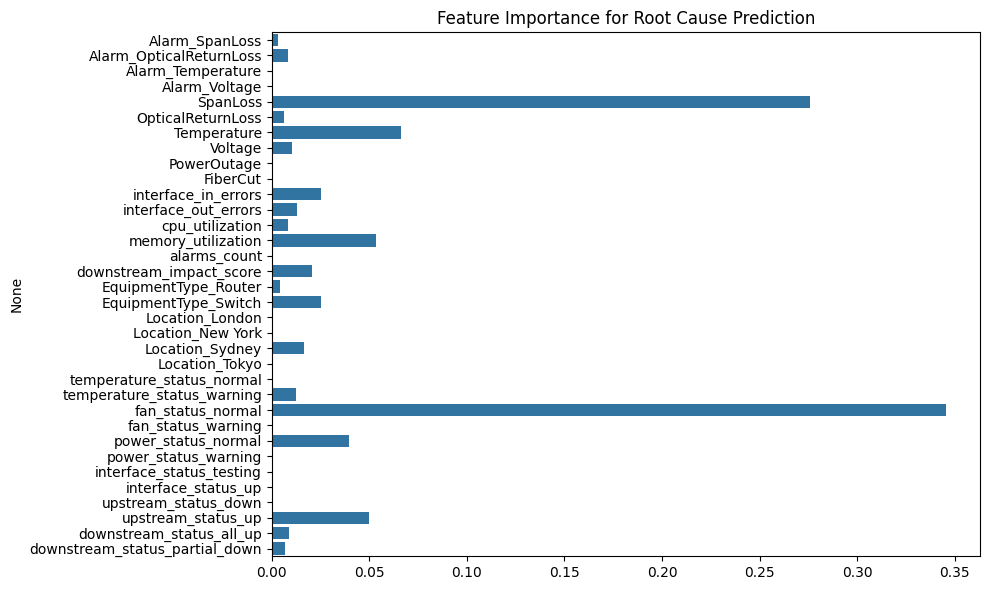

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feat_names)
plt.title("Feature Importance for Root Cause Prediction")
plt.tight_layout()
plt.show()


In [93]:
from mlxtend.frequent_patterns import apriori, association_rules

# Get alarm columns
alarm_columns = [col for col in df.columns if col.startswith('Alarm_')]

# Select rows where predicted root cause
root_df = X_test[(y_pred == 1) | (y_test == 1)].copy()

# Keep only alarm columns
alarm_data = root_df[alarm_columns]

# Ensure values are boolean
alarm_data = alarm_data.astype(bool)


# Run Apriori
frequent_items = apriori(alarm_data, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
# Display rules
rules.sort_values(by='confidence', ascending=False)
    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(Alarm_Voltage),(Alarm_SpanLoss),0.311111,0.844444,0.311111,1.000000,1.184211,1.0,0.048395,inf,0.225806,0.368421,1.000000,0.684211
16,"(Alarm_Temperature, Alarm_Voltage, Alarm_Optic...",(Alarm_SpanLoss),0.088889,0.844444,0.088889,1.000000,1.184211,1.0,0.013827,inf,0.170732,0.105263,1.000000,0.552632
8,"(Alarm_Voltage, Alarm_OpticalReturnLoss)",(Alarm_SpanLoss),0.266667,0.844444,0.266667,1.000000,1.184211,1.0,0.041481,inf,0.212121,0.315789,1.000000,0.657895
11,"(Alarm_Temperature, Alarm_Voltage)",(Alarm_SpanLoss),0.111111,0.844444,0.111111,1.000000,1.184211,1.0,0.017284,inf,0.175000,0.131579,1.000000,0.565789
15,"(Alarm_SpanLoss, Alarm_Temperature, Alarm_Opti...",(Alarm_Voltage),0.088889,0.311111,0.088889,1.000000,3.214286,1.0,0.061235,inf,0.756098,0.285714,1.000000,0.642857
1,(Alarm_OpticalReturnLoss),(Alarm_SpanLoss),0.755556,0.844444,0.688889,0.911765,1.079721,1.0,0.050864,1.762963,0.302053,0.756098,0.432773,0.863777
9,(Alarm_Voltage),"(Alarm_SpanLoss, Alarm_OpticalReturnLoss)",0.311111,0.688889,0.266667,0.857143,1.244240,1.0,0.052346,2.177778,0.284946,0.363636,0.540816,0.622120
7,"(Alarm_SpanLoss, Alarm_Voltage)",(Alarm_OpticalReturnLoss),0.311111,0.755556,0.266667,0.857143,1.134454,1.0,0.031605,1.711111,0.172043,0.333333,0.415584,0.605042
4,(Alarm_Voltage),(Alarm_OpticalReturnLoss),0.311111,0.755556,0.266667,0.857143,1.134454,1.0,0.031605,1.711111,0.172043,0.333333,0.415584,0.605042
0,(Alarm_SpanLoss),(Alarm_OpticalReturnLoss),0.844444,0.755556,0.688889,0.815789,1.079721,1.0,0.050864,1.326984,0.474654,0.756098,0.246411,0.863777


In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from mlxtend.frequent_patterns import apriori, association_rules
from statsmodels.tsa.stattools import grangercausalitytests

# Load data (with increased observations per EquipmentID)
df = pd.read_csv('telecom_merge1.csv')
df.drop(columns=['FaultInjected'], inplace=True)

# Preprocessing
df = pd.get_dummies(df, columns=['EquipmentType', 'Location', 'temperature_status', 
                                 'fan_status', 'power_status', 'interface_status', 
                                 'upstream_status', 'downstream_status'], drop_first=True)

# Scale continuous features
features_to_scale = ['interface_in_errors', 'interface_out_errors', 'cpu_utilization', 
                     'memory_utilization', 'alarms_count', 'downstream_impact_score']
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Prepare features and target
X = df.drop(columns=['IsRootCause', 'EquipmentID', 'Timestamp', 'EquipmentAgeDays', 'ParentDeviceID'])
y = df['IsRootCause']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 1: Correlation Analysis on Actual Root Causes
alarm_columns = [col for col in X.columns if col.startswith('Alarm_')]
root_df_actual = X_test[y_test == 1].copy()
alarm_data_actual = root_df_actual[alarm_columns].astype(bool)

# Include non-alarm features
non_alarm_features = ['cpu_utilization', 'interface_out_errors']
extended_data = root_df_actual[alarm_columns + non_alarm_features].copy()
extended_data['cpu_high'] = (extended_data['cpu_utilization'] > 0.9).astype(bool)
extended_data['errors_high'] = (extended_data['interface_out_errors'] > 0.5).astype(bool)
extended_columns = alarm_columns + ['cpu_high', 'errors_high']
extended_data = extended_data[extended_columns]

# Run Apriori
frequent_items = apriori(extended_data, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.5)
print("Association Rules from Actual Root Causes:")
rules.sort_values(by='confidence', ascending=False)



Association Rules from Actual Root Causes:


c:\Users\hebli_a9ty3nc\NETO_AI\alarm correlation fault prediction\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6,(cpu_high),(Alarm_OpticalReturnLoss),0.075,0.725,0.075,1.0,1.379310,1.0,0.020625,inf,0.297297,0.103448,1.000000,0.551724
2,(Alarm_Voltage),(Alarm_SpanLoss),0.300,0.825,0.300,1.0,1.212121,1.0,0.052500,inf,0.250000,0.363636,1.000000,0.681818
52,"(Alarm_Temperature, Alarm_Voltage, Alarm_Optic...",(errors_high),0.050,0.525,0.050,1.0,1.904762,1.0,0.023750,inf,0.500000,0.095238,1.000000,0.547619
64,"(Alarm_Temperature, Alarm_Voltage, Alarm_Optic...","(Alarm_SpanLoss, errors_high)",0.050,0.375,0.050,1.0,2.666667,1.0,0.031250,inf,0.657895,0.133333,1.000000,0.566667
14,"(Alarm_SpanLoss, cpu_high)",(Alarm_OpticalReturnLoss),0.050,0.725,0.050,1.0,1.379310,1.0,0.013750,inf,0.289474,0.068966,1.000000,0.534483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,"(errors_high, Alarm_Voltage, Alarm_OpticalRetu...",(Alarm_Temperature),0.100,0.325,0.050,0.5,1.538462,1.0,0.017500,1.35,0.388889,0.133333,0.259259,0.326923
56,"(Alarm_SpanLoss, errors_high, Alarm_Voltage, A...",(Alarm_Temperature),0.100,0.325,0.050,0.5,1.538462,1.0,0.017500,1.35,0.388889,0.133333,0.259259,0.326923
50,"(errors_high, Alarm_Temperature, Alarm_Optical...",(Alarm_Voltage),0.100,0.300,0.050,0.5,1.666667,1.0,0.020000,1.40,0.444444,0.142857,0.285714,0.333333
63,"(errors_high, Alarm_Voltage, Alarm_OpticalRetu...","(Alarm_SpanLoss, Alarm_Temperature)",0.100,0.150,0.050,0.5,3.333333,1.0,0.035000,1.70,0.777778,0.250000,0.411765,0.416667


In [102]:
# Step 2: Temporal Analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
grouped = df.groupby('EquipmentID').apply(lambda x: x.sort_values('Timestamp')).reset_index(drop=True)
sequences = grouped[grouped['IsRootCause'] == 1][['EquipmentID', 'Timestamp'] + alarm_columns]

def check_sequence(group):
    group = group.sort_values('Timestamp')
    voltage_times = group[group['Alarm_Voltage'] == 1]['Timestamp']
    spanloss_times = group[group['Alarm_SpanLoss'] == 1]['Timestamp']
    for vt in voltage_times:
        for st in spanloss_times:
            if st > vt:
                return True
    return False

causal_pairs = sequences.groupby('EquipmentID').apply(check_sequence)
print(f"Proportion where Alarm_Voltage precedes Alarm_SpanLoss: {causal_pairs.mean()}")

# Step 3: Granger Causality Test
equipment_counts = df['EquipmentID'].value_counts()
for equipment_id in equipment_counts.index:
    num_observations = equipment_counts[equipment_id]
    if num_observations >= 10:  # Need at least 10 for maxlag=3
        print(f"Selected EquipmentID: {equipment_id} with {num_observations} observations")
        break
else:
    print("Warning: No EquipmentID has enough observations for Granger Causality test with maxlag=3. Reducing maxlag to 1.")
    equipment_id = equipment_counts.index[0]
    maxlag = 1
    num_observations = equipment_counts[equipment_id]
    print(f"Selected EquipmentID: {equipment_id} with {num_observations} observations")

ts_data = df[df['EquipmentID'] == equipment_id][['Timestamp', 'Alarm_Voltage', 'Alarm_SpanLoss']]
ts_data.set_index('Timestamp', inplace=True)
ts_data = ts_data.astype(int)
print("Granger Causality Test: Alarm_Voltage → Alarm_SpanLoss")
grangercausalitytests(ts_data[['Alarm_SpanLoss', 'Alarm_Voltage']], maxlag=maxlag)

# Step 4: Compare with Predicted Root Causes
root_df_pred = X_test[y_pred == 1].copy()
alarm_data_pred = root_df_pred[alarm_columns].astype(bool)
frequent_items_pred = apriori(alarm_data_pred, min_support=0.05, use_colnames=True)
rules_pred = association_rules(frequent_items_pred, metric="confidence", min_threshold=0.5)
#rules_pred.sort_values(by='confidence', ascending=False)

rules['rule'] = rules['antecedents'].astype(str) + " -> " + rules['consequents'].astype(str)
rules_pred['rule'] = rules_pred['antecedents'].astype(str) + " -> " + rules_pred['consequents'].astype(str)
common_rules = set(rules['rule']).intersection(set(rules_pred['rule']))
print(f"Common rules between actual and predicted: {len(common_rules)} out of {len(rules)} actual rules")

rules_pred.sort_values(by='confidence', ascending=False)

Proportion where Alarm_Voltage precedes Alarm_SpanLoss: 0.21296296296296297
Selected EquipmentID: ce-ro-2 with 9 observations
Granger Causality Test: Alarm_Voltage → Alarm_SpanLoss

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2381  , p=0.6462  , df_denom=5, df_num=1
ssr based chi2 test:   chi2=0.3810  , p=0.5371  , df=1
likelihood ratio test: chi2=0.3722  , p=0.5418  , df=1
parameter F test:         F=0.2381  , p=0.6462  , df_denom=5, df_num=1
Common rules between actual and predicted: 14 out of 66 actual rules


C:\Users\hebli_a9ty3nc\AppData\Local\Temp\ipykernel_18604\3389729091.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('EquipmentID').apply(lambda x: x.sort_values('Timestamp')).reset_index(drop=True)
C:\Users\hebli_a9ty3nc\AppData\Local\Temp\ipykernel_18604\3389729091.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  causal_pairs = sequences.groupby('EquipmentID').apply(check_sequ

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,rule
7,"(Alarm_Voltage, Alarm_OpticalReturnLoss)",(Alarm_SpanLoss),0.255814,0.860465,0.255814,1.000000,1.162162,1.0,0.035695,inf,0.187500,0.297297,1.000000,0.648649,"frozenset({'Alarm_Voltage', 'Alarm_OpticalRetu..."
3,(Alarm_Voltage),(Alarm_SpanLoss),0.302326,0.860465,0.302326,1.000000,1.162162,1.0,0.042185,inf,0.200000,0.351351,1.000000,0.675676,frozenset({'Alarm_Voltage'}) -> frozenset({'Al...
15,"(Alarm_Temperature, Alarm_Voltage, Alarm_Optic...",(Alarm_SpanLoss),0.069767,0.860465,0.069767,1.000000,1.162162,1.0,0.009735,inf,0.150000,0.081081,1.000000,0.540541,"frozenset({'Alarm_Temperature', 'Alarm_Voltage..."
10,"(Alarm_Temperature, Alarm_Voltage)",(Alarm_SpanLoss),0.093023,0.860465,0.093023,1.000000,1.162162,1.0,0.012980,inf,0.153846,0.108108,1.000000,0.554054,"frozenset({'Alarm_Temperature', 'Alarm_Voltage..."
14,"(Alarm_SpanLoss, Alarm_Temperature, Alarm_Opti...",(Alarm_Voltage),0.069767,0.302326,0.069767,1.000000,3.307692,1.0,0.048675,inf,0.750000,0.230769,1.000000,0.615385,"frozenset({'Alarm_SpanLoss', 'Alarm_Temperatur..."
1,(Alarm_OpticalReturnLoss),(Alarm_SpanLoss),0.767442,0.860465,0.697674,0.909091,1.056511,1.0,0.037317,1.534884,0.230000,0.750000,0.348485,0.859951,frozenset({'Alarm_OpticalReturnLoss'}) -> froz...
6,"(Alarm_SpanLoss, Alarm_Voltage)",(Alarm_OpticalReturnLoss),0.302326,0.767442,0.255814,0.846154,1.102564,1.0,0.023797,1.511628,0.133333,0.314286,0.338462,0.589744,"frozenset({'Alarm_SpanLoss', 'Alarm_Voltage'})..."
8,(Alarm_Voltage),"(Alarm_SpanLoss, Alarm_OpticalReturnLoss)",0.302326,0.697674,0.255814,0.846154,1.212821,1.0,0.044889,1.965116,0.251515,0.343750,0.491124,0.606410,frozenset({'Alarm_Voltage'}) -> frozenset({'Al...
4,(Alarm_Voltage),(Alarm_OpticalReturnLoss),0.302326,0.767442,0.255814,0.846154,1.102564,1.0,0.023797,1.511628,0.133333,0.314286,0.338462,0.589744,frozenset({'Alarm_Voltage'}) -> frozenset({'Al...
0,(Alarm_SpanLoss),(Alarm_OpticalReturnLoss),0.860465,0.767442,0.697674,0.810811,1.056511,1.0,0.037317,1.229236,0.383333,0.750000,0.186486,0.859951,frozenset({'Alarm_SpanLoss'}) -> frozenset({'A...
